### Ransac Regressor

In [18]:
from sklearn import datasets
import matplotlib as plt
iris=datasets.load_boston()
x=iris.data
y=iris.target

In [9]:
import pandas as pd
X=pd.DataFrame(x)
Y=pd.DataFrame(y)
data=pd.concat([X,Y],axis=1)
data.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
print(data.head())
print(data.shape)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
(506, 14)


In [16]:
'''import seaborn as sns
#import matplotlib.pyplot as plt
col=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
sns.pairplot(data[col],size=4.5)
plt.tight_layout()
plt.show()'''

"import seaborn as sns\nimport matplotlib.pyplot as plt\ncol=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']\nsns.pairplot(data[col],size=4.5)\nplt.tight_layout()\nplt.show()"

In [13]:
X=data[['RM']].values
Y=data[['MEDV']].values
from sklearn.linear_model import LinearRegression,RANSACRegressor
ransac=RANSACRegressor(LinearRegression(),max_trials=100,min_samples=50,loss='absolute_loss',residual_threshold=5.0,random_state=0)
ransac.fit(X,Y)
y_pred=ransac.predict(X)

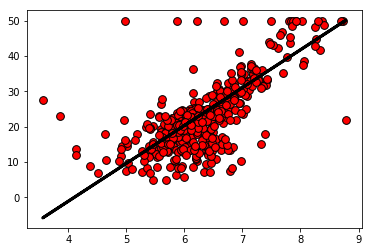

In [17]:
plt.scatter(X,Y,s=60,c='red',edgecolor='black')
plt.plot(X,y_pred,lw=3,c='black')
plt.show()

In [19]:
print('slope:%.3f'%ransac.estimator_.coef_[0])
print('Intercept_on_y_axis:%.3f'%ransac.estimator_.intercept_)

slope:10.735
Intercept_on_y_axis:-44.089
